In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# Load the datasets
sales_data = pd.read_csv('sales_listing_010124_to_041624.csv')
inventory_data = pd.read_csv('reports_inventory_listings_below_reorder_April 16_2024(in) (2).csv')


Data is collected from real time restaurant where sales and inventory data are collected for the month of April.In this project, I am expecting to analyze several key aspects of sales performance and inventory management to optimize stock levels, improve revenue, and enhance operational efficiency. 

**Sales Data Description**:
The sales information consists of 40,663 entries featuring different characteristics linked to transaction activities and sales effectiveness. Here’s an examination of the key characteristics and their implications: 

**Department**: This column classifies items into various departments (e.g., "Bread," "Meat"). Examining sales by department can assist in determining which areas generate the highest revenue and might require prioritization in inventory and promotional efforts. 

**Date and Day of the Week**: By providing details on particular transaction dates and days in the week, this information enables time-oriented evaluation of sales patterns. For instance, specific days (such as weekends) might exhibit increased sales, aiding in decisions regarding staffing, inventory control, and marketing tactics. 

**Description**: The name or description of the product gives information regarding each item. This can be utilized to evaluate sales at the product level, pinpointing top-selling items and those with reduced demand, which might require discontinuation or promotional assistance. 

**Quantity (Qty)**: This section shows the number of units sold in each transaction, which is helpful for determining total sales volume. Items that consistently sell in high volumes might require elevated reorder levels to prevent running out of stock. 

**Retail, Subtotal, Discount, Tax, and Total**: These columns provide an overview of pricing, discounts, and overall sales figures. Analyzing discount trends allows you to determine if specific items perform better with discounts, helping shape future pricing and promotional tactics. 

**Discounted**: This binary field (True/False) shows if a discount was utilized, aiding in evaluating the effect of discounts on overall sales. For instance, a large sales quantity of discounted products might indicate a need for promotional pricing on specific items. 


**Inventory Data**
The inventory data has 112 records focusing on products and their stock levels. Here’s an analysis of the main fields and their importance:

**System ID and UPC**: Unique identifiers for each product help in tracking and managing stock levels. They can also be used to match products with the sales data if a common identifier is found.

**Item**: The item description provides the specific product name, similar to the "Description" field in the sales data. This enables analysis at the individual product level, useful for managing restocking needs for popular items.

**Retail Price**: The listed retail price for each item helps in determining the potential revenue generated by each product. Analyzing retail prices in conjunction with sales can reveal which price ranges are most popular.

**Category**: This categorizes products by type (e.g., "Beverages," "Supplements"). Understanding inventory distribution across categories helps in identifying areas with potential overstock or understock situations. For example, categories with consistently high stock levels may indicate slower-moving products.

**Brand**: The brand column is useful for understanding brand performance. Some brands may have high customer loyalty, resulting in frequent restocking needs, while others may underperform, signaling a need for brand or product reevaluation.

**Needed, Reorder Point, Desired Level, and Quantity on Hand (QOH):**

**Needed**: Represents the number of units needed for restocking. High values here suggest that these products are in high demand or low stock and may need more frequent reordering.

**Reorder Point**: This is the stock level at which reordering should occur to prevent stockouts. Products consistently hitting the reorder point indicate steady demand.

**Desired Level**: The ideal stock level for each product. Comparing the desired level with actual stock (QOH) helps in determining which products are understocked or overstocked.

**Quantity on Hand (QOH)**: The current stock level available. Items with low QOH and high reorder points may be at risk of stockouts, especially for high-demand products.

**Backorders**: This column indicates items that are requested but currently unavailable, impacting customer satisfaction. High backorder levels suggest issues in the supply chain or in maintaining adequate stock for high-demand products.

In [2]:
sales_data

,Department,ID,Date,Description,Qty,Retail,Subtotal,Discount,Tax,Total
0,Bread,845847,1/26/2024,Food For Life Ezekiel Pocket Bread,1,4.29,4.29,0.21,0.0,4.08
1,Bread,845847,1/26/2024,Food For Life Ezekiel Pocket Bread,1,4.29,4.29,0.21,0.0,4.08
2,Bread,846835,2/5/2024,Food For Life Ezekiel Pocket Bread,1,4.29,4.29,0.00,0.0,4.29
3,Bread,846835,2/5/2024,Food For Life Ezekiel Pocket Bread,1,4.29,4.29,0.00,0.0,4.29
4,Bread,848666,2/23/2024,Food For Life Ezekiel Pocket Bread,1,4.29,4.29,1.07,0.0,3.22
...,...,...,...,...,...,...,...,...,...,...
40658,Meat,851922,3/28/2024,Cafe Spice Chicken Tikka Naan Toastie,1,6.49,6.49,1.62,0.0,4.87
40659,Meat,852298,4/1/2024,Cafe Spice Chicken Tikka Naan Toastie,1,6.49,6.49,1.62,0.0,4.87
40660,Meat,853625,4/14/2024,Cafe Spice Chicken Tikka Naan Toastie,1,6.49,6.49,0.32,0.0,6.17
40661,Meat,852132,3/30/2024,AppleGate Chicken Tenders Natural Family Size ...,1,16.19,16.19,0.00,0.0,16.19


In [3]:
inventory_data

,System ID,UPC,Item,Vendor #,Retail,Category,Brand,Needed,Reorder Point,Desired Level,QOH,Backorders
0,210000000321,75502386679,mineral water sparkling 25.3oz gerolsteiner,NaN,$3.39,Beverages / Bottled water,Gerolsteiner,13,6,15,2,0
1,210000000760,602444001409,Wyndmere Carrot Seed 10mL 16,NaN,$19.89,Essential oil,Wyndmere Naturals,2,2,3,1,0
2,210000003470,733739033406,prostate support 90 sgels NOW FOODS,NaN,$24.99,Supplements,Now Foods,2,0,2,0,0
3,210000003472,733739014108,boron 100cps 3mg NOW FOODS,NaN,$8.99,Supplements / Minerals,Now Foods,1,1,2,1,0
4,210000003512,33984017115,magnesium citrate 120tbs solgar,1711,$17.99,Supplements / Minerals,Solgar,2,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
107,210000036135,885898000321,Emergen-C box Immune + Raspberry,NaN,$15.99,Supplements,Alacer Corp,2,0,2,0,0
108,210000036139,853311003051,kevita strawberry coconut 15.2oz,NaN,$4.49,Beverages / Kombucha,KeVita,12,3,12,0,0
109,210000037817,733739070166,pine nuts OG 8oz NOW FOODS,7016,$18.99,Nuts/seeds,Now Foods,6,1,6,0,0
110,210000041395,700360003122,maitake mushrooms dried OG .5oz Mycological,PMTS,$4.79,Vegetables / Dried,MycoLogical,5,2,6,1,0


In [4]:
# Check for missing values in both datasets
print("Missing values in Sales Data:")
print(sales_data.isnull().sum())
print("Missing values in Inventory Data:")
print(inventory_data.isnull().sum())


Missing values in Sales Data:
Department     0
ID             0
Date           0
Description    0
Qty            0
Retail         0
Subtotal       0
Discount       0
Tax            0
Total          0
dtype: int64
Missing values in Inventory Data:
System ID         0
UPC               0
Item              0
Vendor #         76
Retail            0
Category          0
Brand             0
Needed            0
Reorder Point     0
Desired Level     0
QOH               0
Backorders        0
dtype: int64


In [5]:
inventory_data = inventory_data.drop(columns=['Vendor #'])

In [6]:
inventory_data.head()

,System ID,UPC,Item,Retail,Category,Brand,Needed,Reorder Point,Desired Level,QOH,Backorders
0,210000000321,75502386679,mineral water sparkling 25.3oz gerolsteiner,$3.39,Beverages / Bottled water,Gerolsteiner,13,6,15,2,0
1,210000000760,602444001409,Wyndmere Carrot Seed 10mL 16,$19.89,Essential oil,Wyndmere Naturals,2,2,3,1,0
2,210000003470,733739033406,prostate support 90 sgels NOW FOODS,$24.99,Supplements,Now Foods,2,0,2,0,0
3,210000003472,733739014108,boron 100cps 3mg NOW FOODS,$8.99,Supplements / Minerals,Now Foods,1,1,2,1,0
4,210000003512,33984017115,magnesium citrate 120tbs solgar,$17.99,Supplements / Minerals,Solgar,2,1,2,0,0


In [14]:
inventory_data.describe

<bound method NDFrame.describe of         System ID           UPC                                         Item  \
0    210000000321   75502386679  mineral water sparkling 25.3oz gerolsteiner   
1    210000000760  602444001409                 Wyndmere Carrot Seed 10mL 16   
2    210000003470  733739033406          prostate support 90 sgels NOW FOODS   
3    210000003472  733739014108                   boron 100cps 3mg NOW FOODS   
4    210000003512   33984017115              magnesium citrate 120tbs solgar   
..            ...           ...                                          ...   
107  210000036135  885898000321            Emergen-C box Immune +  Raspberry   
108  210000036139  853311003051             kevita strawberry coconut 15.2oz   
109  210000037817  733739070166                   pine nuts OG 8oz NOW FOODS   
110  210000041395  700360003122  maitake mushrooms dried OG .5oz Mycological   
111  210000045108  733739070227           brazil nuts raw OG 10 oz NOW FOODS   

     

In [13]:
sales_data.describe

<bound method NDFrame.describe of       Department      ID       Date  \
0          Bread  845847 2024-01-26   
1          Bread  845847 2024-01-26   
2          Bread  846835 2024-02-05   
3          Bread  846835 2024-02-05   
4          Bread  848666 2024-02-23   
...          ...     ...        ...   
40658       Meat  851922 2024-03-28   
40659       Meat  852298 2024-04-01   
40660       Meat  853625 2024-04-14   
40661       Meat  852132 2024-03-30   
40662       Meat  852545 2024-04-04   

                                             Description  Qty  Retail  \
0                     Food For Life Ezekiel Pocket Bread    1    4.29   
1                     Food For Life Ezekiel Pocket Bread    1    4.29   
2                     Food For Life Ezekiel Pocket Bread    1    4.29   
3                     Food For Life Ezekiel Pocket Bread    1    4.29   
4                     Food For Life Ezekiel Pocket Bread    1    4.29   
...                                                  ...  .

Together, the sales and inventory data enable an in-depth examination of the restaurant's product performance and stock control.

Sales Compared to Inventory Levels: Products with high demand in the sales records that have low quantities on hand in the inventory records indicate a requirement for increased reorder levels to prevent stock shortages.

Category-Level Assessment: Examining inventory quantities by category in conjunction with sales by department can uncover which categories are overstocked or lacking in sales performance.

Discount and Demand Relationship: Analyzing items that perform well during discounting can guide future promotional pricing, particularly for goods that have excess stock in the inventory records.

Seasonal or Weekly Trends: Examining sales patterns over time in connection with inventory can aid in determining when to boost stock replenishment to match seasonal or weekly demand surges.

These insights can help enhance inventory management, minimize surplus stock, and boost revenue by ensuring that high-demand products are always accessible to customers.

### Sales Over Time

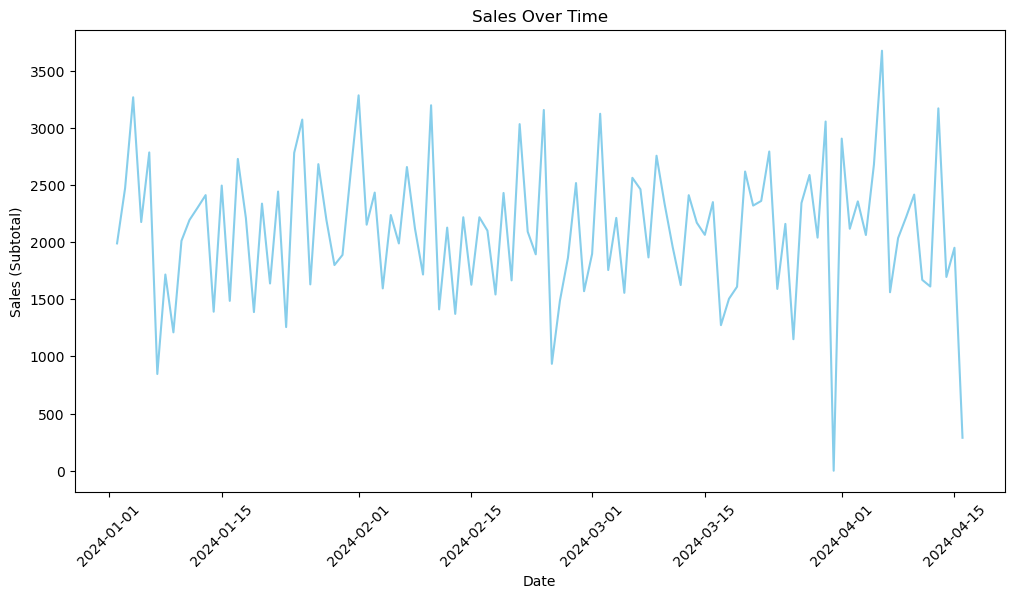

In [7]:
# Convert 'Date' column to datetime
sales_data['Date'] = pd.to_datetime(sales_data['Date'])

# Aggregate the sales data by date (sum of Subtotal per date)
sales_by_date = sales_data.groupby('Date')['Subtotal'].sum()

# Plot sales over time
plt.figure(figsize=(12, 6))
plt.plot(sales_by_date.index, sales_by_date.values, color='skyblue')
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales (Subtotal)')
plt.xticks(rotation=45)
plt.show()


Insight: This line plot shows the daily sales trends (Subtotal) over the analyzed period, revealing fluctuations and patterns in purchasing behavior.<br>

Explanation: This plot is crucial for identifying peak sales periods and potential patterns in consumer behavior. By observing the spikes and drops, management can align inventory restocking and staffing schedules to match busy periods. For example, high sales peaks might indicate promotional events or specific product demands that could be further explored.

### Total Inventory by Category

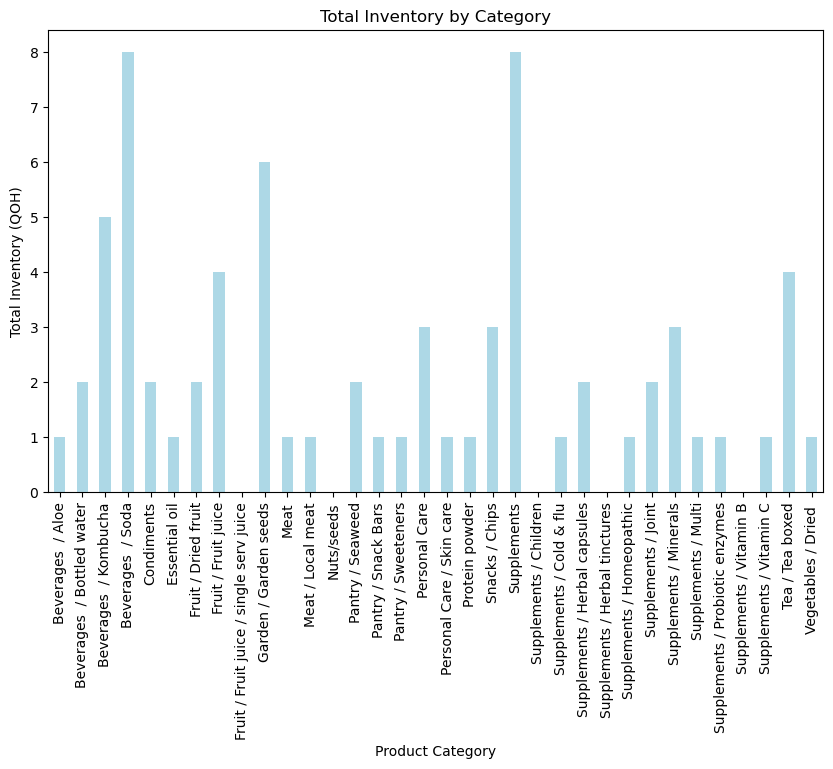

In [8]:
# Group inventory by category
category_inventory = inventory_data.groupby('Category')['QOH'].sum()

plt.figure(figsize=(10, 6))
category_inventory.plot(kind='bar', color='lightblue')
plt.title('Total Inventory by Category')
plt.xlabel('Product Category')
plt.ylabel('Total Inventory (QOH)')
plt.show()

Insight: This bar chart displays the total inventory on hand (QOH) for each product category, highlighting categories with higher or lower stock levels.<br>

Explanation: Understanding inventory distribution by category is essential for effective stock management. Categories with consistently low inventory might require increased reorder points to avoid stockouts, while categories with high levels could indicate overstocking, leading to holding costs. This visualization allows inventory managers to optimize stock levels across different categories based on demand patterns.

### Stock-out Risk Analysis

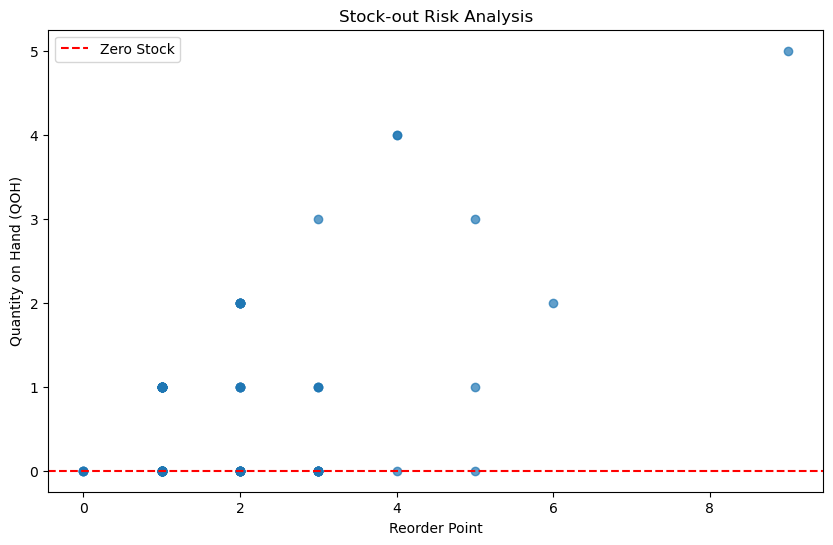

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(inventory_data['Reorder Point'], inventory_data['QOH'], alpha=0.7)
plt.title("Stock-out Risk Analysis")
plt.xlabel("Reorder Point")
plt.ylabel("Quantity on Hand (QOH)")
plt.axhline(0, color='red', linestyle='--', label='Zero Stock')
plt.legend()
plt.show()

Insight: This scatter plot shows the relationship between the quantity on hand (QOH) and reorder points for various products, with products near or below the zero stock line flagged as being at risk of stockouts.

Explanation: This plot helps identify products that frequently approach or fall below their reorder points, signaling a risk of stockouts. Items below the red line need urgent restocking to prevent lost sales. This analysis is important for maintaining a continuous supply of high-demand items and minimizing the potential for customer dissatisfaction due to unavailable products.

### Sales Distribution by Day of the Week

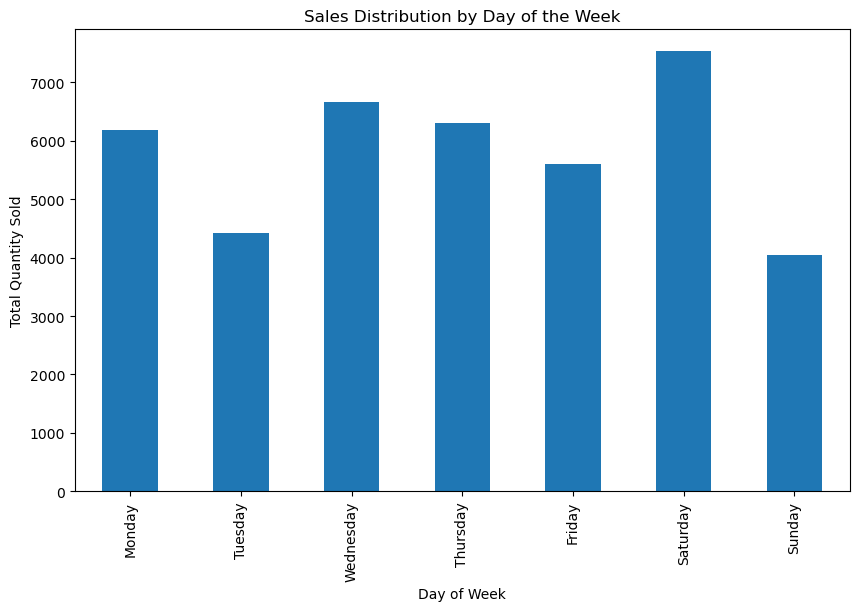

In [12]:
# Extract day of the week
sales_data['Day of Week'] = sales_data['Date'].dt.day_name()

# Group by Day of Week and sum the quantity sold
sales_by_day = sales_data.groupby('Day of Week')['Qty'].sum().reindex(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])

# Plot
plt.figure(figsize=(10, 6))
sales_by_day.plot(kind='bar')
plt.title("Sales Distribution by Day of the Week")
plt.xlabel("Day of Week")
plt.ylabel("Total Quantity Sold")
plt.show()

Insight: This bar chart reveals sales volume (Total Quantity Sold) across each day of the week, indicating which days are busiest for sales.

Explanation: Understanding sales distribution by day of the week allows for better planning of resources and promotions. For example, if Saturdays consistently show the highest sales, management can ensure adequate staffing and inventory levels to meet demand. Conversely, slower days could be targeted with promotions to boost sales. This information is valuable for operational adjustments and customer engagement strategies.